# CURSO DATA SCIENCE

## Módulo 2: Análise Estatística e Exploratória de Dados

### Aula 1 - Análise Estatística de Dados

### Bootstrap

#### Usando Bootstrap para estimar o valor da média de uma população:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
from plotnine import *

In [2]:
#Dados aleatórios seguindo uma distribuição Normal
#x = np.random.normal(loc=500.0, scale=1.0, size=10000)

#Dados aleatórios (sem seguir uma distribuição específica)
x = np.random.random_sample(10000)

#Média real da "população" (dataset)
np.mean(x)

0.50221651918141

In [3]:
sample_mean = []

# Bootstrap sampling

for i in range(40):
    y = random.sample(x.tolist(), 5)
    avg = np.mean(y)
    
    sample_mean.append(avg)

In [4]:
sample_mean

[0.6088556144723583,
 0.5913451849872874,
 0.3819287339640073,
 0.3915959538704322,
 0.6400569949985633,
 0.561936581361537,
 0.8434314023807279,
 0.5852879341791223,
 0.20839418503971863,
 0.6044626670702608,
 0.4527545754761551,
 0.5188069480519767,
 0.4376771728199397,
 0.49106408842554156,
 0.40722670624085877,
 0.4286976329485185,
 0.6937436168494711,
 0.533818954509057,
 0.6106939933871569,
 0.32565728252479864,
 0.24950406924065022,
 0.35754782843834537,
 0.3530191517286029,
 0.4163476593979416,
 0.7003838902713866,
 0.6259600448073409,
 0.7577826196905285,
 0.7129755325004288,
 0.6550622132598317,
 0.5730482386632145,
 0.36295004556416155,
 0.7821505802607442,
 0.537016339448942,
 0.6985693337992063,
 0.5021748612884155,
 0.48349180166724437,
 0.5159985863086429,
 0.6072349358945786,
 0.3286149630379815,
 0.6088555715155739]

In [5]:
#Média estimada usando Bootstrap
np.mean(sample_mean)

0.5286531122585313

# Teorema do Limite Central

### Gerando um novo conjunto de dados no intervalo de 1 a 100:

In [6]:
x = []
for i in range(10000):
    x.append(random.randint(1, 100))

In [7]:
np.mean(x)

51.2081

### Distribuição dos dados da população (dataset):

In [9]:
k = int(math.sqrt(len(x)))
k

100

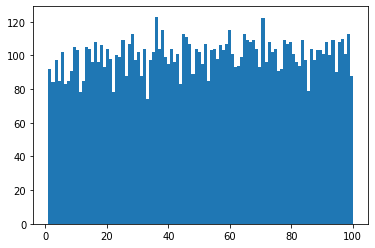

In [10]:
plt.hist(x, bins=k) 
plt.show()

### Aplicando o Teorema do Limite Central usando Bootstrap:

In [11]:
sample_mean2 = []

# Bootstrap sampling

for i in range(40):
    y = random.sample(x, 5)
    avg = np.mean(y)
    sample_mean2.append(np.round(avg,0))

In [12]:
sample_mean2

[31.0,
 58.0,
 61.0,
 55.0,
 48.0,
 55.0,
 68.0,
 40.0,
 61.0,
 47.0,
 44.0,
 42.0,
 69.0,
 44.0,
 50.0,
 81.0,
 37.0,
 67.0,
 67.0,
 30.0,
 42.0,
 65.0,
 85.0,
 45.0,
 50.0,
 56.0,
 77.0,
 20.0,
 45.0,
 64.0,
 41.0,
 43.0,
 62.0,
 41.0,
 47.0,
 68.0,
 81.0,
 44.0,
 37.0,
 55.0]

### Distribuição das médias calculadas sobre as amostras:

In [13]:
k = int(math.sqrt(len(sample_mean2)))
k

6

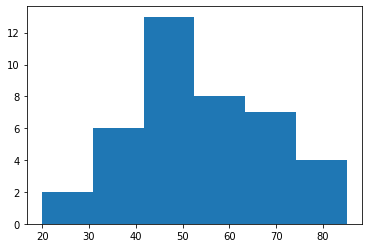

In [14]:
plt.hist(sample_mean2, bins=k) 
plt.show()

### Distribuição dos dados da população (dataset) usando Sturges:

In [15]:
k = math.ceil(1 + 3.3 * math.log10(len(x)))
k

15

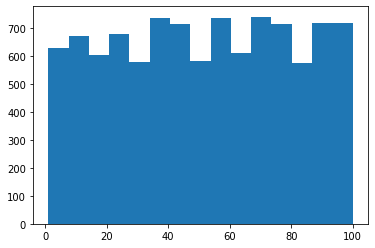

In [16]:
plt.hist(x, bins=k) 
plt.show()

### Distribuição das médias calculadas sobre as amostras (usando Sturges):

In [17]:
k = math.ceil(1 + 3.3 * math.log10(len(sample_mean2)))
k

7

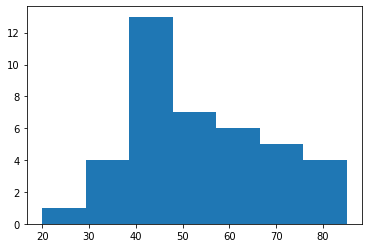

In [18]:
plt.hist(sample_mean2, bins=k) 
plt.show()

# Distribuição Normal

In [38]:
housefly_df = pd.DataFrame(data=[36,37,38,38,39,39,40,40,40,40,41,41,41,41,41,41,42,42,42,42,42,42,42,43,
43,43,43,43,43,43,43,44,44,44,44,44,44,44,44,44,45,45,45,45,45,45,45,45,45,45,46,46,46,46,46,46,46,46,46,
46,47,47,47,47,47,47,47,47,47,48,48,48,48,48,48,48,48,49,49,49,49,49,49,49,50,50,50,50,50,50,51,51,51,51,
52,52,53,53,54,55])

In [39]:
# Distribuição de Frequência
freq_df = housefly_df.groupby([0]).size().reset_index(name='Fabs')
freq_df

,0,Fabs
0,36,1
1,37,1
2,38,2
3,39,2
4,40,4
5,41,6
6,42,7
7,43,8
8,44,9
9,45,10


In [40]:
length = freq_df[0]
labels = freq_df['Fabs']

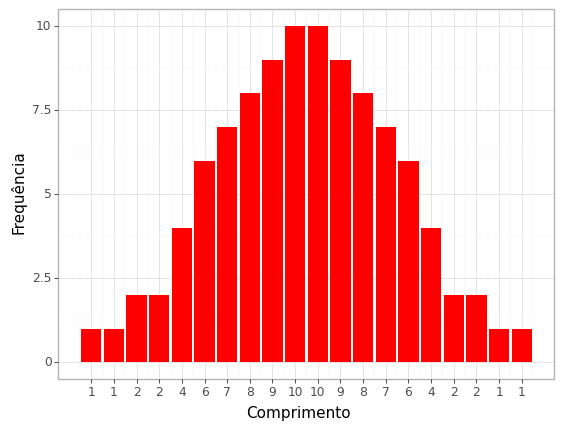

<ggplot: (8793530724928)>

In [41]:
(ggplot(freq_df, aes(freq_df[0],'Fabs'))
  + geom_col(fill='red')
  + scale_x_continuous(breaks=length, labels=labels)
  + theme_light()
  + xlab('Comprimento')
  + ylab('Frequência')
)

### Usando matplotlib

### Fórmula de Sturges

In [42]:
k = math.ceil(1 + 3.3 * math.log10( housefly_df.size ))
k

8

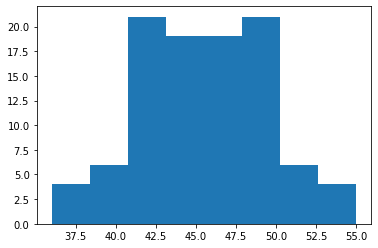

In [43]:
import matplotlib.pyplot as plt
plt.hist(housefly_df[0], bins=k) 
plt.show()

Sturges não gerou uma distribuição conhecida

### Raiz de n

In [44]:
k = int(math.sqrt( housefly_df.size ))
k

10

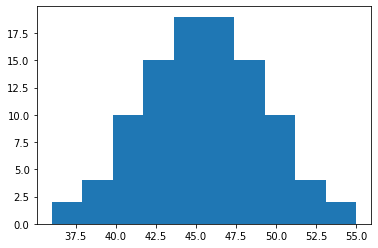

In [45]:
plt.hist(housefly_df[0], bins=k) 
plt.show()

## Boxplot

<AxesSubplot:>

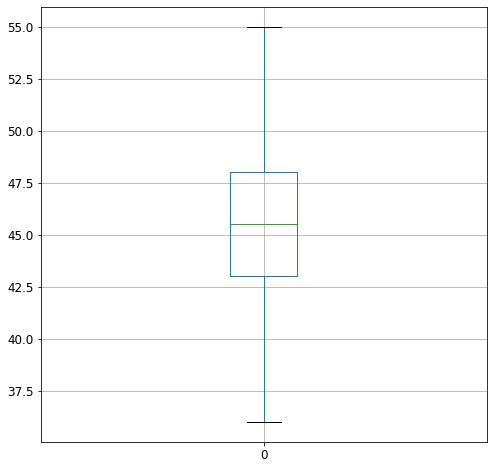

In [46]:
housefly_df.boxplot(column=[0], fontsize='large', figsize=(8,8))

### Aplicando normalização Z-Score no Dataset

O Dataset agora comporta-se de forma contínua!

In [ ]:
Padronização Z-Score
● Forçar média 0 e variância unitária (o que é chamado tamém de padronização ou
standardization);
● Para uma população: z = (x - mi) / DP população
● Para uma amostra: z = (x - xbarra) / DP amostra

In [47]:
housefly_z_df = stats.zscore(housefly_df)
housefly_z_df

array([[-2.43589744],
       [-2.17948718],
       [-1.92307692],
       [-1.92307692],
       [-1.66666667],
       [-1.66666667],
       [-1.41025641],
       [-1.41025641],
       [-1.41025641],
       [-1.41025641],
       [-1.15384615],
       [-1.15384615],
       [-1.15384615],
       [-1.15384615],
       [-1.15384615],
       [-1.15384615],
       [-0.8974359 ],
       [-0.8974359 ],
       [-0.8974359 ],
       [-0.8974359 ],
       [-0.8974359 ],
       [-0.8974359 ],
       [-0.8974359 ],
       [-0.64102564],
       [-0.64102564],
       [-0.64102564],
       [-0.64102564],
       [-0.64102564],
       [-0.64102564],
       [-0.64102564],
       [-0.64102564],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.38461538],
       [-0.12820513],
       [-0.12820513],
       [-0.12820513],
       [-0.12820513],
       [-0.12820513],
       [-0

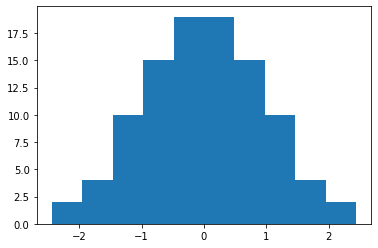

In [48]:
plt.hist(housefly_z_df) 
plt.show()

##  QQ-Plot

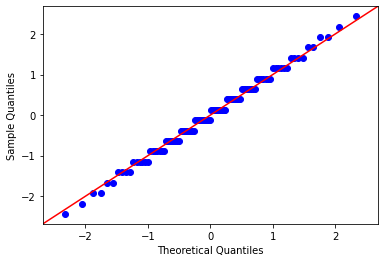

In [49]:
sm.qqplot(housefly_z_df, line ='45') 
py.show() 

# Transformação Logarítmica

In [50]:
file = pd.read_csv('diamonds.csv')

In [51]:
file

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [52]:
from plotnine import *

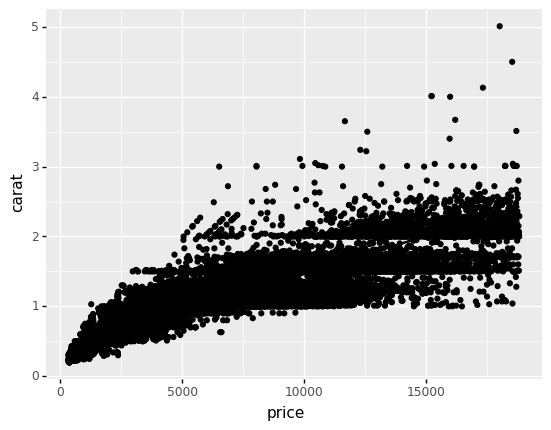

<ggplot: (8793531597369)>

In [53]:
(ggplot(file, aes(file['price'], file['carat']))
+ geom_point() 
+ geom_smooth(method='lm')
)

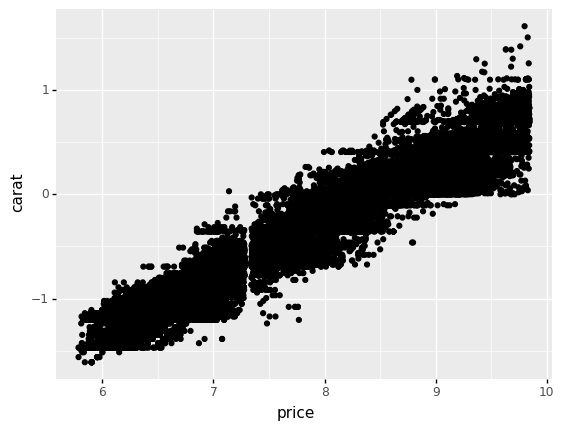

<ggplot: (8793530650716)>

In [54]:
(ggplot(file, aes(np.log(file['price']), np.log(file['carat'])))
+ geom_point() 
+ geom_smooth(method='lm')
)

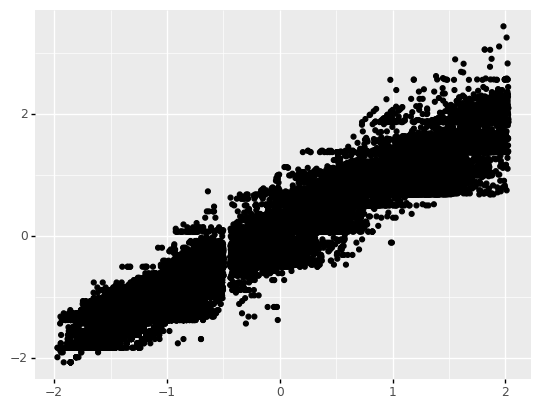

<ggplot: (8793531425032)>

In [55]:
(ggplot(file, aes(stats.zscore(np.log(file['price'])), stats.zscore(np.log(file['carat']))))
+ geom_point() 
+ geom_smooth(method='lm')
)

In [56]:
k = int(math.sqrt( file.size ))
k

770

In [57]:
k = math.ceil(1 + 3.3 * math.log10( file.size ))
k

21

(array([17608.,  7170.,  5438.,  3711.,  4170.,  3237.,  2257.,  1748.,
         1325.,  1136.,   934.,   826.,   754.,   624.,   558.,   513.,
          435.,   421.,   392.,   354.,   329.]),
 array([  326.        ,  1206.80952381,  2087.61904762,  2968.42857143,
         3849.23809524,  4730.04761905,  5610.85714286,  6491.66666667,
         7372.47619048,  8253.28571429,  9134.0952381 , 10014.9047619 ,
        10895.71428571, 11776.52380952, 12657.33333333, 13538.14285714,
        14418.95238095, 15299.76190476, 16180.57142857, 17061.38095238,
        17942.19047619, 18823.        ]),
 <BarContainer object of 21 artists>)

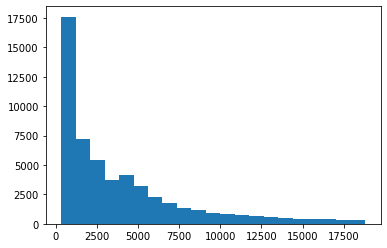

In [58]:
plt.hist(file['price'], bins=k) 

(array([ 234., 1135., 2296., 3449., 4222., 3897., 2968., 1809., 3098.,
        2664., 3085., 2853., 2915., 4074., 3442., 2825., 2246., 2023.,
        1797., 1517., 1391.]),
 array([5.78689738, 5.98003726, 6.17317714, 6.36631701, 6.55945689,
        6.75259677, 6.94573665, 7.13887652, 7.3320164 , 7.52515628,
        7.71829615, 7.91143603, 8.10457591, 8.29771579, 8.49085566,
        8.68399554, 8.87713542, 9.0702753 , 9.26341517, 9.45655505,
        9.64969493, 9.84283481]),
 <BarContainer object of 21 artists>)

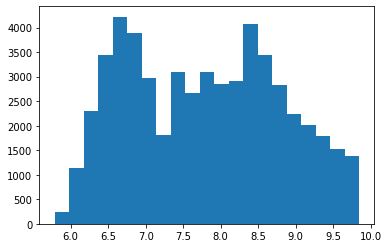

In [59]:
plt.hist(np.log(file['price']), bins=k) 

(array([1.6479e+04, 8.5550e+03, 7.0620e+03, 1.0660e+04, 4.4900e+03,
        3.1730e+03, 1.2470e+03, 1.1240e+03, 8.0000e+02, 2.0700e+02,
        9.2000e+01, 1.1000e+01, 2.7000e+01, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([0.2       , 0.42904762, 0.65809524, 0.88714286, 1.11619048,
        1.3452381 , 1.57428571, 1.80333333, 2.03238095, 2.26142857,
        2.49047619, 2.71952381, 2.94857143, 3.17761905, 3.40666667,
        3.63571429, 3.8647619 , 4.09380952, 4.32285714, 4.55190476,
        4.78095238, 5.01      ]),
 <BarContainer object of 21 artists>)

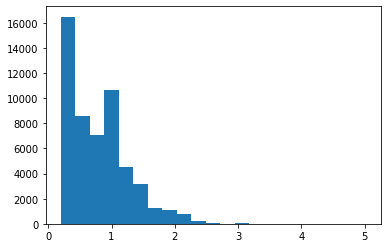

In [60]:
plt.hist(file['carat'], bins=k) 

(array([3.190e+02, 9.520e+02, 5.181e+03, 5.178e+03, 5.337e+03, 1.965e+03,
        5.006e+03, 1.217e+03, 5.972e+03, 3.271e+03, 7.485e+03, 4.377e+03,
        1.406e+03, 3.708e+03, 4.120e+02, 1.903e+03, 2.000e+02, 3.800e+01,
        7.000e+00, 4.000e+00, 2.000e+00]),
 array([-1.60943791, -1.45606297, -1.30268802, -1.14931308, -0.99593814,
        -0.84256319, -0.68918825, -0.5358133 , -0.38243836, -0.22906341,
        -0.07568847,  0.07768647,  0.23106142,  0.38443636,  0.53781131,
         0.69118625,  0.84456119,  0.99793614,  1.15131108,  1.30468603,
         1.45806097,  1.61143592]),
 <BarContainer object of 21 artists>)

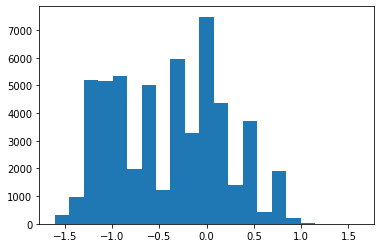

In [61]:
plt.hist(np.log(file['carat']), bins=k) 